In [1]:
import torch
import torchvision
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [2]:
train = datasets.MNIST("E:/ml/torch_mnist_data", train = True, download=True,transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("E:/ml/torch_mnist_data", train = False, download=True ,transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [4]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [5]:
x,y = data[0][0], data[1][0] # data[0][0] first[0] is image and [0 ] is label.  data[1][0]  first[1] is image and [0] is label.

In [6]:
print(y)

tensor(1)


In [7]:
print(x)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [8]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


TypeError: Invalid shape (1, 28, 28) for image data

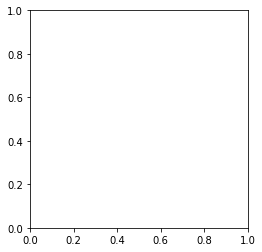

In [9]:
plt.imshow(data[0][0]) # we  have ([1, 28, 28]) but we don't want 1 so we have to reshape it

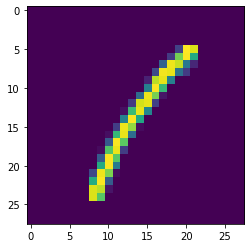

In [11]:
plt.imshow(data[0][0].view(28,28)) # view is for reshape 

In [12]:
total = 0
counter_dict = {0:0,1:0, 2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs,ys = data
    for y in ys:
        counter_dict[int(y)] +=1
        total +=1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [13]:
# gives the percentage of the number how many orecentage of the data we have

for i in counter_dict:
    print(f"{i} : {counter_dict[i]/total*100}") 

0 : 9.871666666666666
1 : 11.236666666666666
2 : 9.93
3 : 10.218333333333334
4 : 9.736666666666666
5 : 9.035
6 : 9.863333333333333
7 : 10.441666666666666
8 : 9.751666666666667
9 : 9.915000000000001


In [14]:
total

60000

In [15]:
import torch.nn as nn # object oriented programing
import torch.nn.functional as F # when we have to use the direct function

In [16]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__() # if we don't write this it gives the erorr
        self.fc1 = nn.Linear(28*28, 64) # nn.Linear(28*28, 64) 28*28 is input 64 is output
        self.fc2 = nn.Linear(64, 64) # nn.Linear(64, 64) first 64 is input second 64 is output
        self.fc3 = nn.Linear(64, 64) # nn.Linear(64, 64) first 64 is input second 64 is output
        self.fc4 = nn.Linear(64, 10) # nn.Linear(64, 10) first 64 is input second 10 is output because we want 10 class for 10 numbers
        
    def forward(self,x):
        
        x = F.relu(self.fc1(x)) # apply activation function
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1) # dim=1 is outputlayer tensor it always stay 1
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [17]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

In [18]:
output = net(X)

In [19]:
output

tensor([[-2.2993, -2.3603, -2.3223, -2.3661, -2.2707, -2.2571, -2.2932, -2.2955,
         -2.2515, -2.3167]], grad_fn=<LogSoftmaxBackward>)

In [20]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001 )# lr= -3 is same

EPOCH = 3

for epoch in range(EPOCH):
    for data in trainset:
        # data is a batch of featureset and lables
        X,y = data
        net.zero_grad() # every time you pass your data through network
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output,y) # when we have scaler values so use one hot (nll_loss) .# if data is one hot vectoer use mean square vectoer
        loss.backward() # for backpropagation. if we don't write this pytorch automatically take this
        optimizer.step() # it adjust the weight for us
    print(loss)
        
        

tensor(0.0961, grad_fn=<NllLossBackward>)
tensor(0.0034, grad_fn=<NllLossBackward>)
tensor(0.3051, grad_fn=<NllLossBackward>)


In [23]:
corrct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                corrct +=1
            total +=1

print("Accuracy:", round(corrct/total, 3))


Accuracy: 0.977


In [24]:
X

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

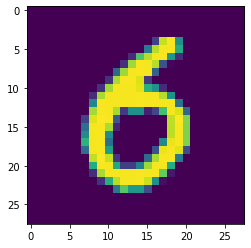

In [27]:
plt.imshow(X[5].view(28,28))

In [29]:
print(torch.argmax(net(X[5].view(-1, 784))[0]))

tensor(6, grad_fn=<NotImplemented>)
